# Numerical Solution to the 1D Schrodinger Equation

$$-\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2}+V(x)\psi=E\psi$$

with boundary conditions $\psi(0)=\psi(L)=0$ that make the system a regular Strum-Liouville eigenvalue problem.

## Dimensionless Formulation

We begin by setting $\hbar=1$ (we'll plug it back in at the end) and multiplying by $m$ both sides,
$$-\frac{\hbar^2}{2}\frac{d^2\psi}{dx^2}+mV(x)\psi=mE\psi$$
so we are just left with the $x$ quantity that has a dimension. To remove this last dimension quantity we make the substitution $\alpha = x/L$ which is dimensionless.
$$-\frac{\hbar^2}{2}\frac{d^2\psi}{d\alpha^2}+mL^2V(x)\psi=mL^2E\psi$$
where we multiplied by $L^2$ on both sides to leave the derivative *alone*. Now the boundary conditions take a much simpler form,
$$\psi(\alpha=0)=\psi(\alpha=1)=0$$

## Matrix Formulation
First of all we *discretize* the second order derivative using the formula $f''(x)= (f(x+h)-2f(x)+f(x-h))/h^2$,
$$\frac{d^2\psi}{d\alpha^2}=\frac{\psi_{i+1}-2\psi_i+\psi_{i-1}}{\Delta α^2}$$
so the full equation becomes,
$$-\frac 1 2 \frac{\psi_{i+1}-2\psi_i+\psi_{i-1}}{\Delta α^2} + mL^2V_i\psi_i=mL^2E\psi_i$$
and simplifying the left side by *grabbing* the common factor $\psi_i$ out of the parenthesis,
$$-\frac{1}{2\Delta\alpha^2}\psi_{i+1}+ \left[\frac 1 {\Delta \alpha^2} + mL^2 V_i\right]\psi_i -\frac{\psi_{i-1}}{2\Delta\alpha^2}=mL^2E\psi_i$$
finally we have achieved our goal of having a dimension-less equation that is discretized and can be easily put in matrix form.

## Numerical Calculations

In [83]:
N = 1000
dα = 1/N
α = range(0,1, length = N)

0.0:0.001001001001001001:1.0

In [84]:
mL²V(α) = 1000 .* sin.(20 * α) .* α.^4

mL²V (generic function with 1 method)

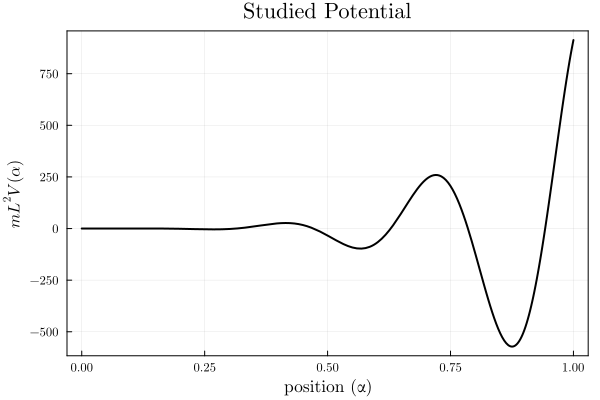

In [85]:
using Plots
using LaTeXStrings

plotFont = "Computer Modern"
default("Computer Modern", linewidth = 2, framestyle = :box, label = nothing, grid = true)

plot(mL²V, 0, 1, title = "Studied Potential", 
    linecolor = :black, xlabel = "position (α)",ylabel  = L"mL^2V(\alpha)" )

to setup the matrix form of the system of $N-2$ (the states $0$ and $N$ are zero by the boundary conditions) equations we first note that we'll only have three diagonals with non-null values, the main one $i$, the one below $i-1$ and the one above $i+1$. And each will hold the coefficients in front of the corresponding $\psi_n$, that is $1/\Delta\alpha^2+mL^2V_i$ for the main one and $-1/2\Delta \alpha^2$ for the other two. 

This matrix of coefficients will then be multiplied by the column vector of $\psi$s and this product will be equal to the same vector of $\psi$s times $mL^2E$, aka our eigenvalue problem.

In [86]:
mainDiagonalCoeff = 1/(dα^2) .+ mL²V(α)

1000-element Vector{Float64}:
 1.0e6
 1.0e6
 1.0000000000000007e6
 1.0000000000000049e6
 1.0000000000000206e6
 1.0000000000000627e6
 1.0000000000001559e6
 1.0000000000003367e6
 1.0000000000006559e6
 1.0000000000011805e6
 ⋮
 1.0008097171508262e6
 1.0008235022532959e6
 1.0008370507885201e6
 1.000850355037394e6
 1.0008634073268472e6
 1.0008762000336e6
 1.0008887255879241e6
 1.0009009764774084e6
 1.0009129452507276e6

In [87]:
otherDiagCoeff = -1/(2dα^2) .* ones(length(mainDiagonalCoeff)-1)

999-element Vector{Float64}:
 -500000.0
 -500000.0
 -500000.0
 -500000.0
 -500000.0
 -500000.0
 -500000.0
 -500000.0
 -500000.0
 -500000.0
       ⋮
 -500000.0
 -500000.0
 -500000.0
 -500000.0
 -500000.0
 -500000.0
 -500000.0
 -500000.0
 -500000.0

we now can use the fact that we have a tridiagonal matrix to compute the eigenvalues and eigenvectors (https://en.wikipedia.org/wiki/Tridiagonal_matrix#Eigenvalues)

In [88]:
using LinearAlgebra

H = SymTridiagonal(mainDiagonalCoeff, otherDiagCoeff)

1000×1000 SymTridiagonal{Float64, Vector{Float64}}:
       1.0e6  -500000.0           ⋅     …         ⋅               ⋅ 
 -500000.0          1.0e6  -500000.0              ⋅               ⋅ 
        ⋅     -500000.0          1.0e6            ⋅               ⋅ 
        ⋅            ⋅     -500000.0              ⋅               ⋅ 
        ⋅            ⋅            ⋅               ⋅               ⋅ 
        ⋅            ⋅            ⋅     …         ⋅               ⋅ 
        ⋅            ⋅            ⋅               ⋅               ⋅ 
        ⋅            ⋅            ⋅               ⋅               ⋅ 
        ⋅            ⋅            ⋅               ⋅               ⋅ 
        ⋅            ⋅            ⋅               ⋅               ⋅ 
       ⋮                                ⋱                  
        ⋅            ⋅            ⋅               ⋅               ⋅ 
        ⋅            ⋅            ⋅               ⋅               ⋅ 
        ⋅            ⋅            ⋅               ⋅         

In [89]:
E, Ψ = eigen(H)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
1000-element Vector{Float64}:
 -340.0123290386911
  -13.089069469743265
   23.29965112237562
   75.85976082415658
   84.41756444227485
  151.28310285888523
  232.8611280835123
  319.86952507820126
  394.74931961142977
  481.0887533637447
    ⋮
    1.9995789388619396e6
    1.9996762088245049e6
    1.9997670128283757e6
    1.9997885653245368e6
    1.999844799552946e6
    1.9998892562279024e6
    1.9999486059349962e6
    1.9999908884915567e6
    2.00010795615041e6
vectors:
1000×1000 Matrix{Float64}:
 1.02603e-12   4.28772e-5   0.000437739  …   0.000245448  -8.35285e-8
 2.05276e-12   8.57556e-5   0.000875458     -0.000490892   1.67075e-7
 3.08088e-12   0.000128636  0.00131314       0.000736327  -2.50658e-7
 4.1111e-12    0.00017152   0.00175075      -0.000981748   3.34294e-7
 5.14412e-12   0.000214409  0.00218829       0.00122715   -4.18003e-7
 6.18063e-12   0.000257303  0.00262572   …  -0.00147253    5.01802e-7
 7.22134e-12

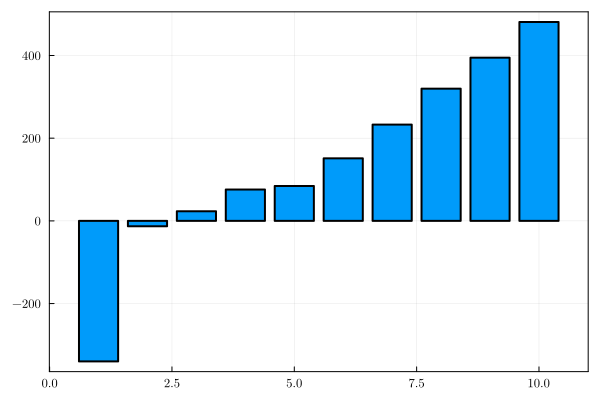

In [90]:
# Energies
bar(1:10, E[1:10], grid = true) 

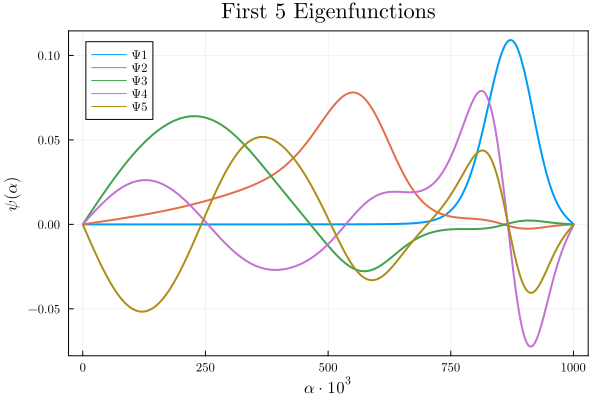

In [91]:
#plot(Ψ)
Ψ = Ψ[:,1:5]
plot(Ψ, title = "First 5 Eigenfunctions", legend=:topleft, label = ["Ψ1" "Ψ2" "Ψ3" "Ψ4" "Ψ5" "Ψ6"], xlabel = L"\alpha\cdot10^3", ylabel = L"\psi(\alpha)")

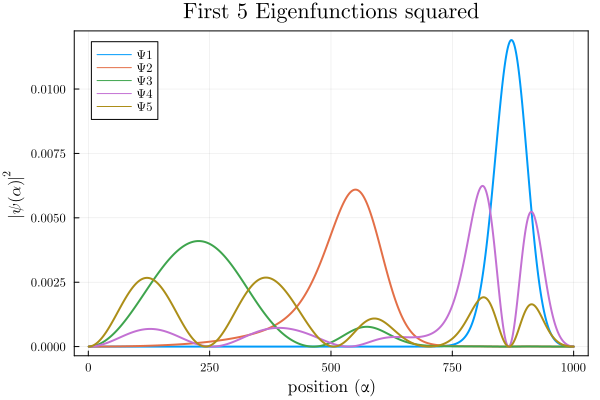

In [92]:
plot(Ψ .^2, title = "First 5 Eigenfunctions squared", legend=:topleft,label = ["Ψ1" "Ψ2" "Ψ3" "Ψ4" "Ψ5" "Ψ6"], xlabel = "position (α)", ylabel = L"|\psi(\alpha)|^2")